In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer

In [2]:
df=pd.read_csv("Country-Data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Country name as index
df.set_index("country",inplace=True)

In [4]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# Five Point Summary

df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


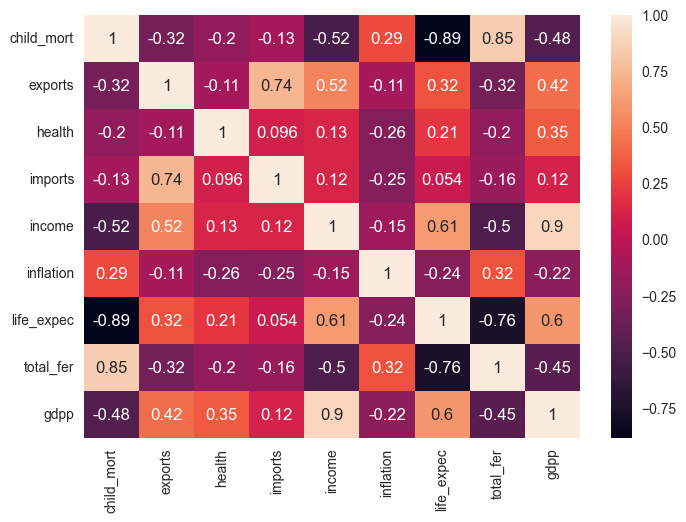

In [6]:
# Lets create a heatmapp for the correlation criteria.
sns.heatmap(df.corr(),annot=True)
plt.show()

In [7]:
plt.rcParams["figure.figsize"]=[15,10]

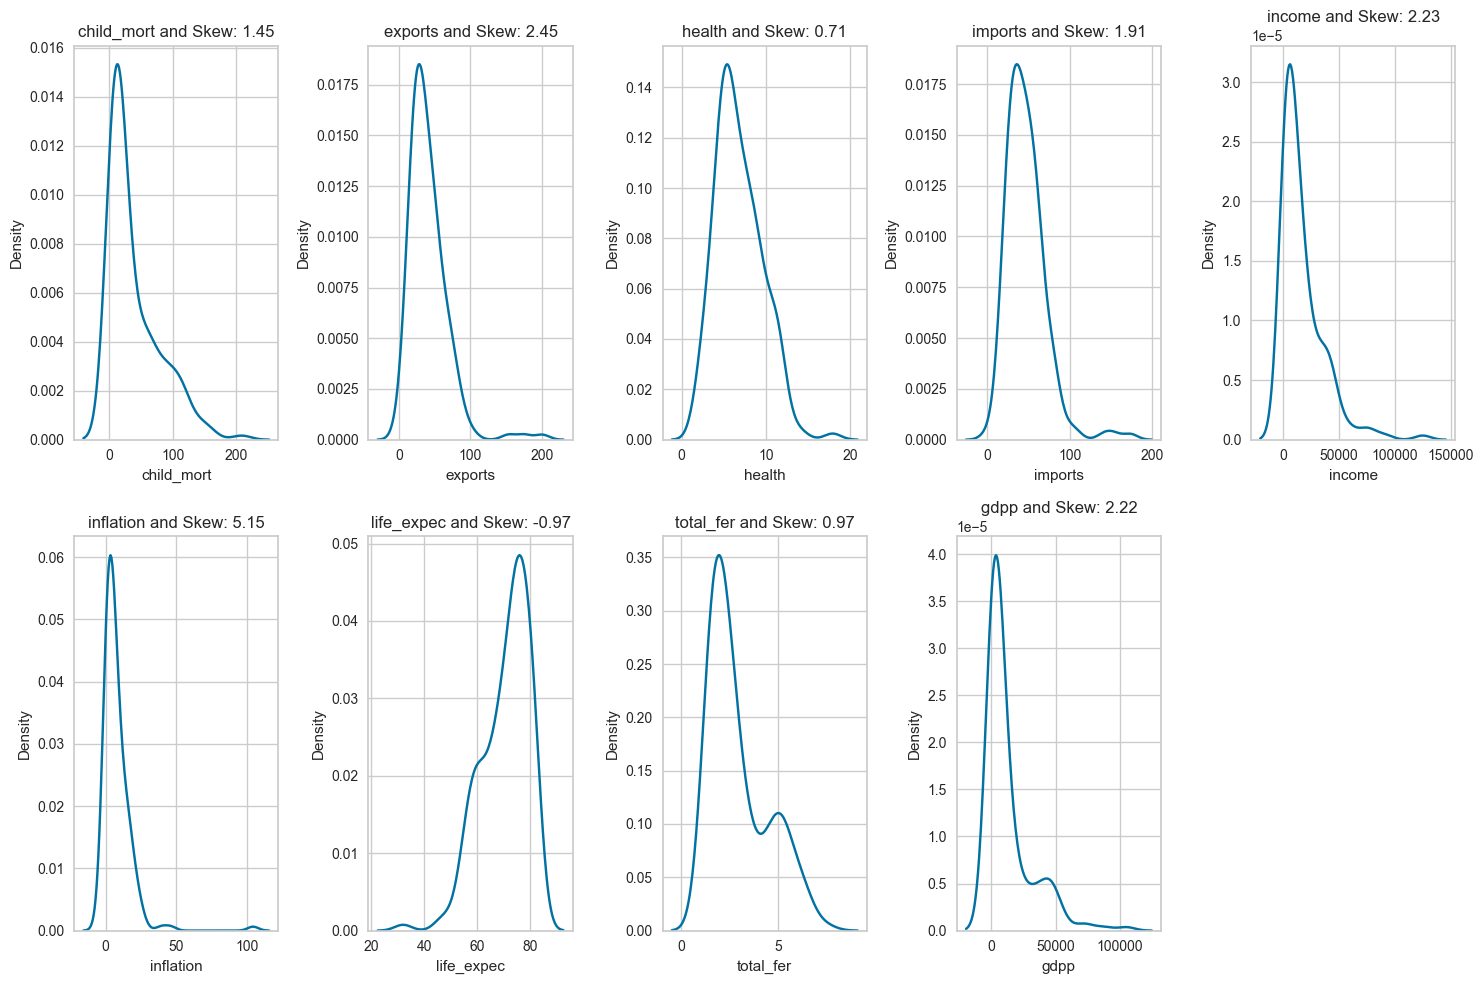

In [8]:
# lets look at the distribution of columns
t=1
for i in df.columns:
    plt.subplot(2,5,t)
    sns.kdeplot(df[i])
    plt.title(f"{i} and Skew: {round(df[i].skew(),2)}")
    t+=1

plt.tight_layout()
plt.show()

In [9]:
# lets check for missing values
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

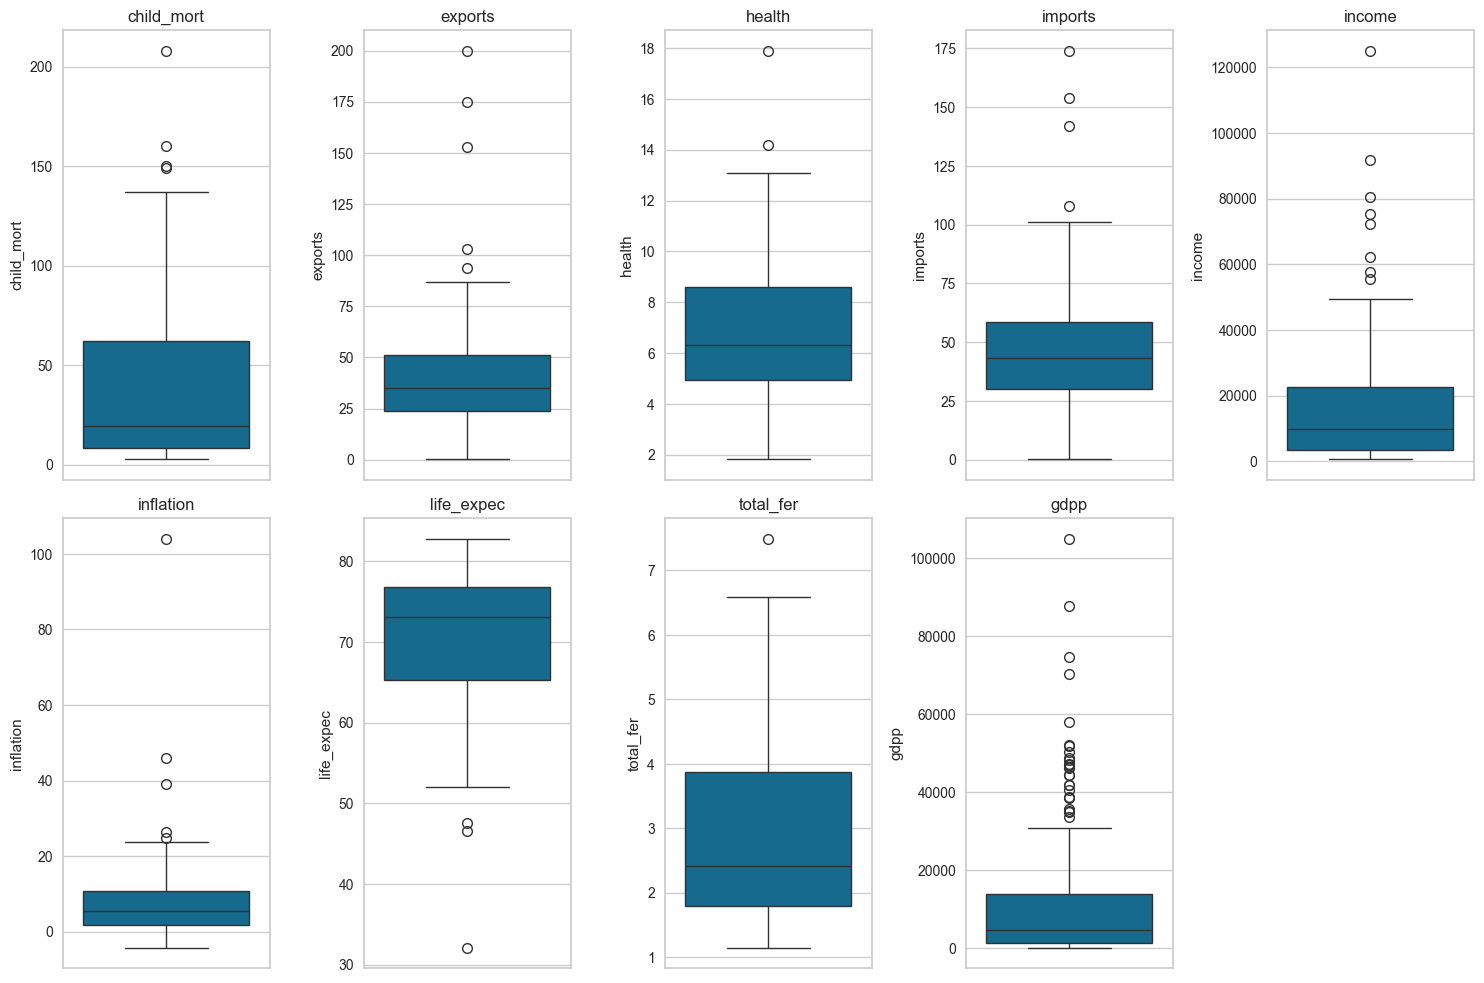

In [10]:
# Lets check for outliers
t=1
for i in df.columns:
    plt.subplot(2,5,t)
    sns.boxplot(df[i])
    plt.title(f"{i}")
    t+=1

plt.tight_layout()
plt.show()

In [11]:
# We need to treat the outliers 
# We will use IQR method to treat the outliers (We will only treat the extreme ones.)
# Lets keep whisker length =2.5
# We will go with capping.


In [12]:
for i in df.columns:
    q3,q1=np.quantile(df[i],[0.75,0.25])
    iqr=q3-q1
    ul,lw=q3+2.5*iqr,q1-2.5*iqr
    df[i]=df[i].apply(lambda x:ul if x>ul else lw  if x<lw else x)

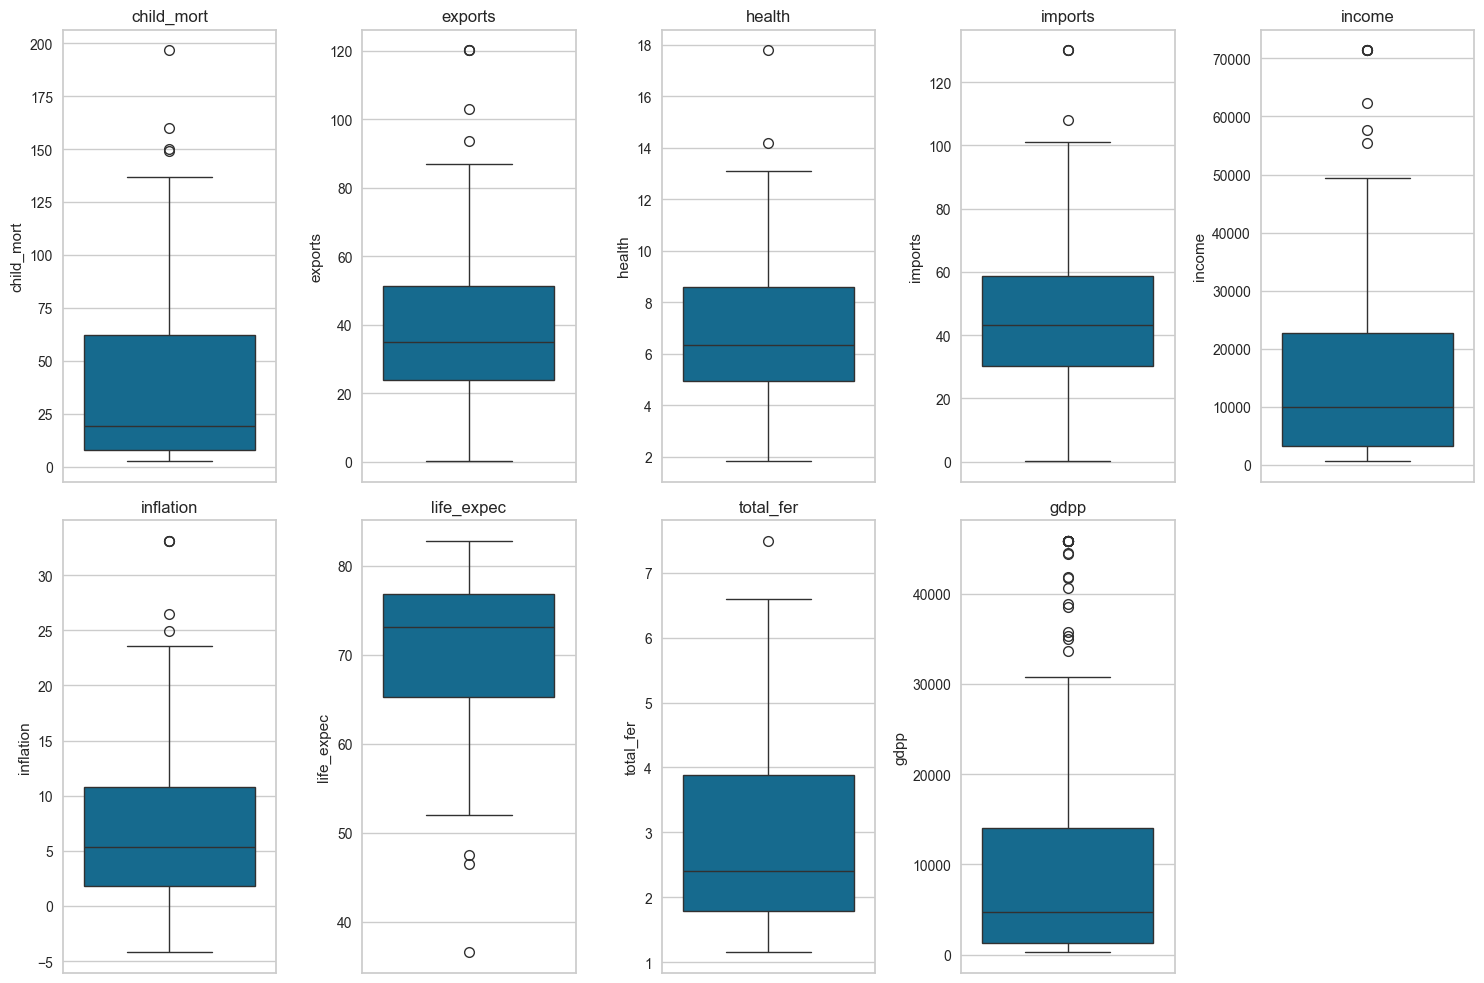

In [13]:
# Lets check for outliers
t=1
for i in df.columns:
    plt.subplot(2,5,t)
    sns.boxplot(df[i])
    plt.title(f"{i}")
    t+=1

plt.tight_layout()
plt.show()

# Boxplot is changing as per the whisker value.
# We find the max limit and with respect to that we perform calculations.

In [14]:
# Lets scale the data

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [16]:
data_s=pd.DataFrame(sc.fit_transform(df),columns=df.columns,index=df.index)

In [17]:
data_s.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.302168,-1.314143,0.279553,-0.068565,-0.878427,0.303790,-1.642400,1.902882,-0.767399
Albania,-0.540991,-0.528460,-0.096883,0.099062,-0.391534,-0.381016,0.652932,-0.859973,-0.526335
Algeria,-0.273031,-0.074510,-0.966706,-0.680176,-0.217727,1.225166,0.675771,-0.038404,-0.501118
Angola,2.023403,0.968702,-1.449130,-0.159174,-0.627373,2.096738,-1.197037,2.128151,-0.564502
Antigua and Barbuda,-0.698761,0.235398,-0.286928,0.565699,0.145102,-0.802968,0.710030,-0.541946,0.026399


# PCA

In [18]:
from sklearn.decomposition import PCA

In [19]:
# Lets apply PCA
pca=PCA(n_components=9)
# N_componenets tells us how many PC's we will be making

In [20]:
pca.fit(data_s)

PCA(n_components=9)

In [21]:
# lets decide how many PC's to keep 
# Lets keep PC's that explain atleast 90% of variance
pca.explained_variance_ratio_.cumsum()

array([0.4758564 , 0.64300208, 0.77845398, 0.88018006, 0.94647697,
       0.96981892, 0.98571825, 0.99510744, 1.        ])

In [22]:
# Lets go with 5 PC's
pca1=PCA(n_components=5)

In [23]:
final_pca=pd.DataFrame(pca1.fit_transform(data_s),columns=["PC1","PC2","PC3","PC4","PC5"],index=data_s.index)

# Dimension are reduced to support the model creation

In [24]:
final_pca

,PC1,PC2,PC3,PC4,PC5
country,,,,,
Afghanistan,-3.043637,-0.201155,0.951322,0.793445,-0.006800
Albania,0.423415,-0.371463,0.171749,-1.353581,0.088623
Algeria,-0.404684,-0.440312,-1.636775,-0.573008,0.397119
Angola,-3.150063,1.425283,-1.784982,1.580071,0.142609
Antigua and Barbuda,1.145313,0.392985,0.151332,-0.823193,-0.370311
...,...,...,...,...,...
Vanuatu,-0.828141,0.812072,0.314558,-0.715821,-0.527346
Venezuela,-0.572007,-1.456583,-3.029355,0.232195,1.994067
Vietnam,0.391400,1.868710,-0.234175,-0.909466,1.304821


In [25]:
pca1.explained_variance_ratio_.cumsum()

array([0.4758564 , 0.64300208, 0.77845398, 0.88018006, 0.94647697])

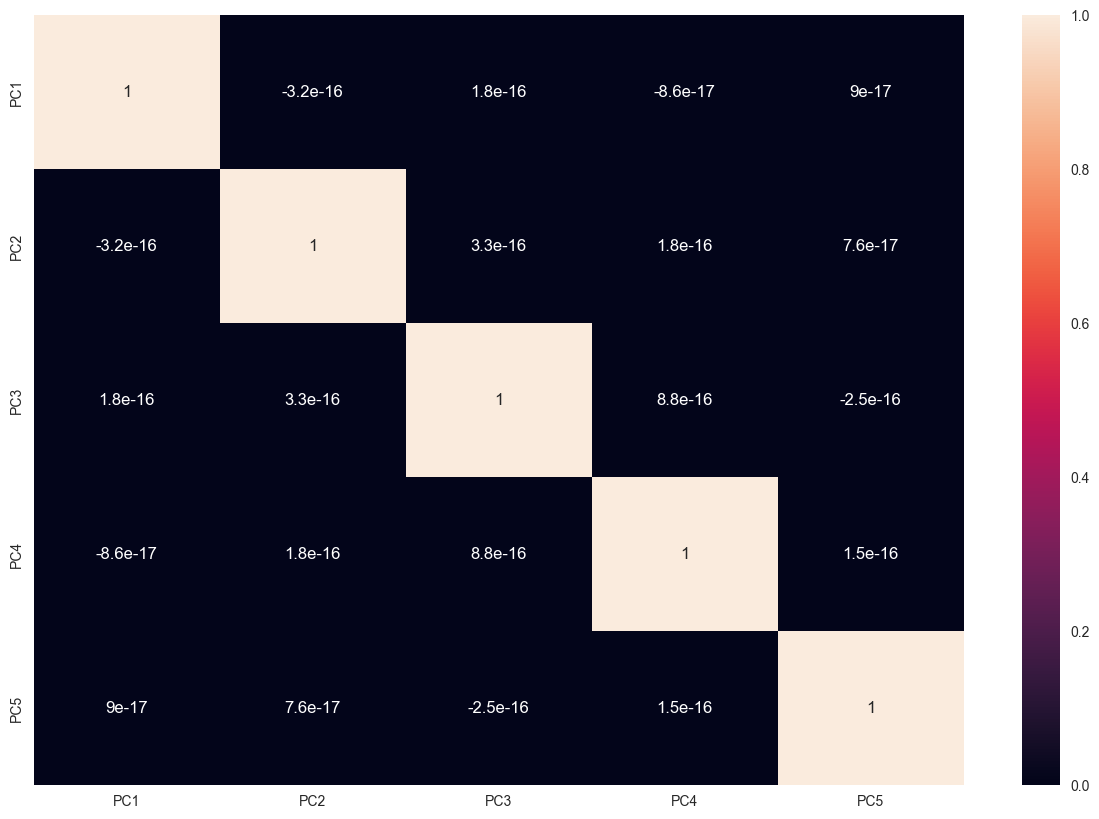

In [26]:
sns.heatmap(final_pca.corr(),annot=True)
plt.show()

# No correlation between the variables or PC's

# KMeans Clustering 

In [27]:
# Decide the K value 

# Elbow method 

kelbow=KElbowVisualizer(estimator=KMeans(random_state=2),k=10)

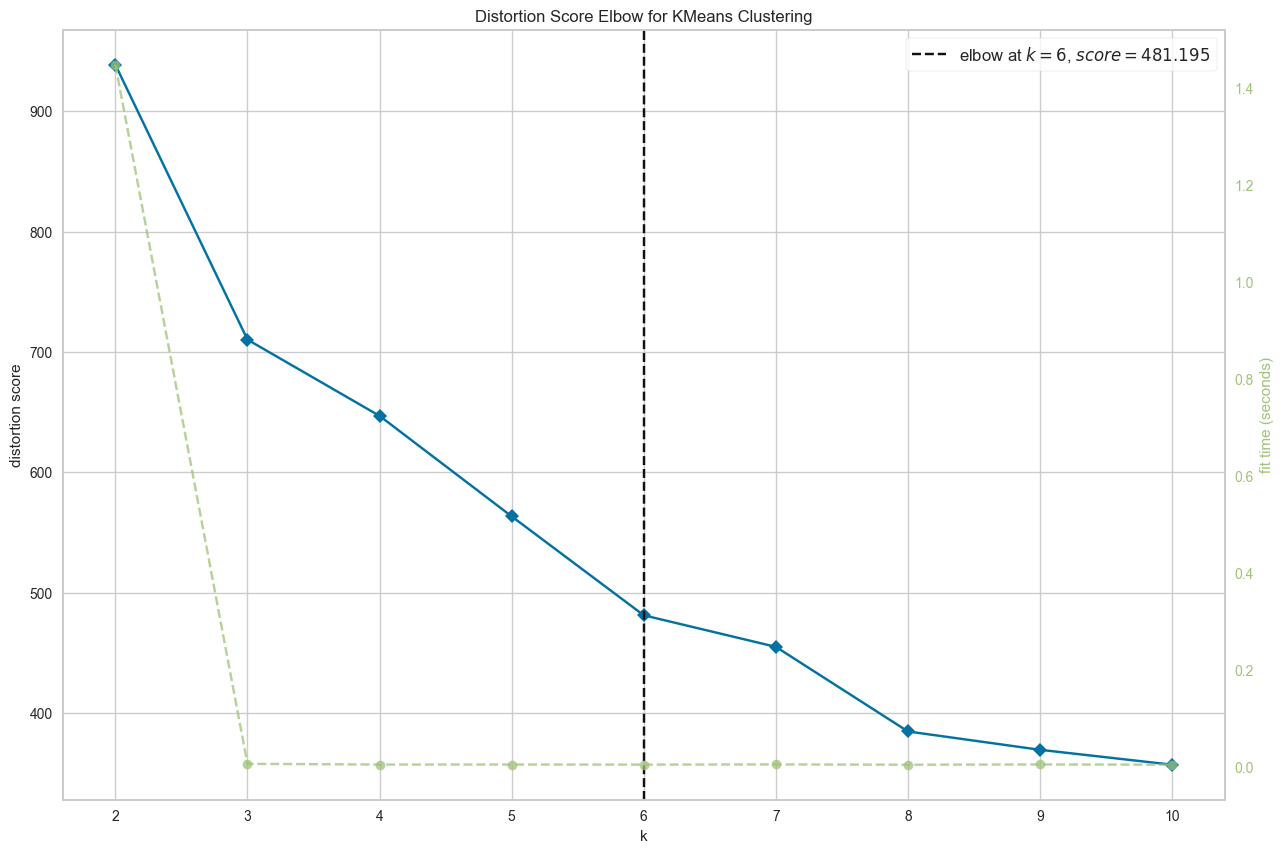

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
kelbow.fit(final_pca)
kelbow.show()

In [29]:
plt.rcParams["figure.figsize"]=[15,10]

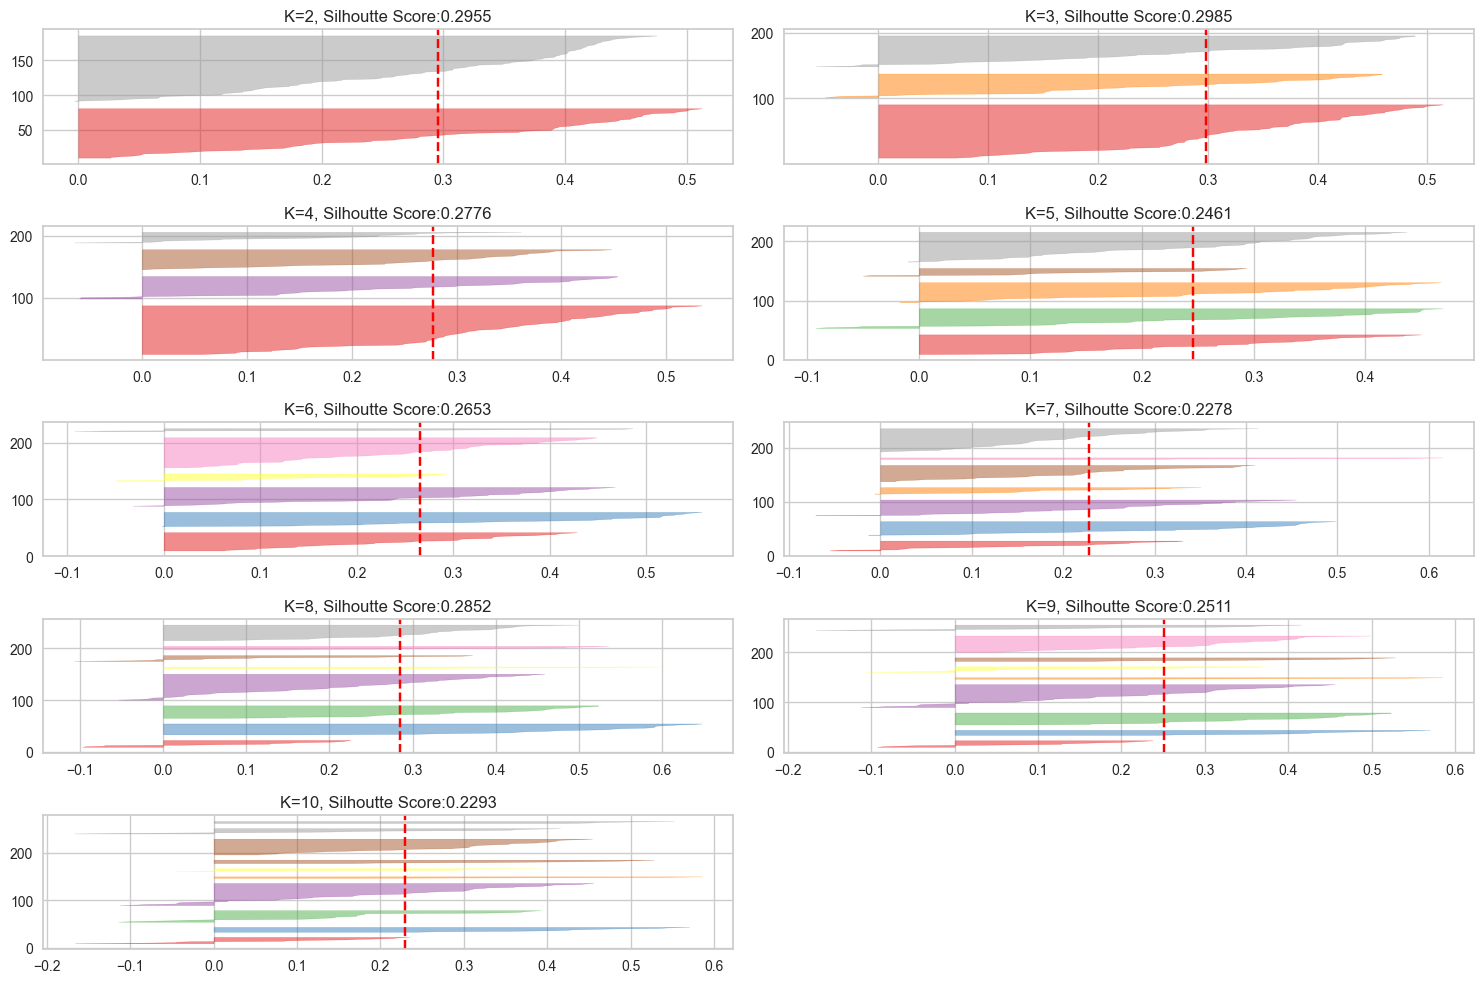

In [30]:
# Method Silhoutte Visualizer
t=1
for i in range(2,11):
    plt.subplot(5,2,t)
    model=KMeans(n_clusters=i,random_state=2)
    sil_viz=SilhouetteVisualizer(estimator=model)
    sil_viz.fit(final_pca)
    plt.title(f"K={i}, Silhoutte Score:{round(sil_viz.silhouette_score_,4)}")
    t+=1

plt.tight_layout()
plt.show()

In [31]:
kmeans_final=KMeans(n_clusters=3,random_state=2)

In [32]:
kmeans_final.fit(final_pca)

KMeans(n_clusters=3, random_state=2)

In [33]:
pred=kmeans_final.predict(final_pca)

In [34]:
pd.Series(pred).value_counts()

0    82
2    48
1    37
Name: count, dtype: int64

# Centroids

In [35]:
centroids=kmeans_final.cluster_centers_

In [36]:
centroids

array([[ 0.17875525,  0.05341484, -0.20504774, -0.75501774,  0.17891715],
       [ 2.84546398, -0.32884162,  0.1503381 ,  0.8430014 , -0.22073048],
       [-2.49875204,  0.16223172,  0.23440427,  0.6400084 , -0.13550372]])

In [37]:
# Lets Visualize the cluster

final_pca["label"]=pred

In [38]:
final_pca.head()

,PC1,PC2,PC3,PC4,PC5,label
country,,,,,,
Afghanistan,-3.043637,-0.201155,0.951322,0.793445,-0.006800,2
Albania,0.423415,-0.371463,0.171749,-1.353581,0.088623,0
Algeria,-0.404684,-0.440312,-1.636775,-0.573008,0.397119,0
Angola,-3.150063,1.425283,-1.784982,1.580071,0.142609,2
Antigua and Barbuda,1.145313,0.392985,0.151332,-0.823193,-0.370311,0


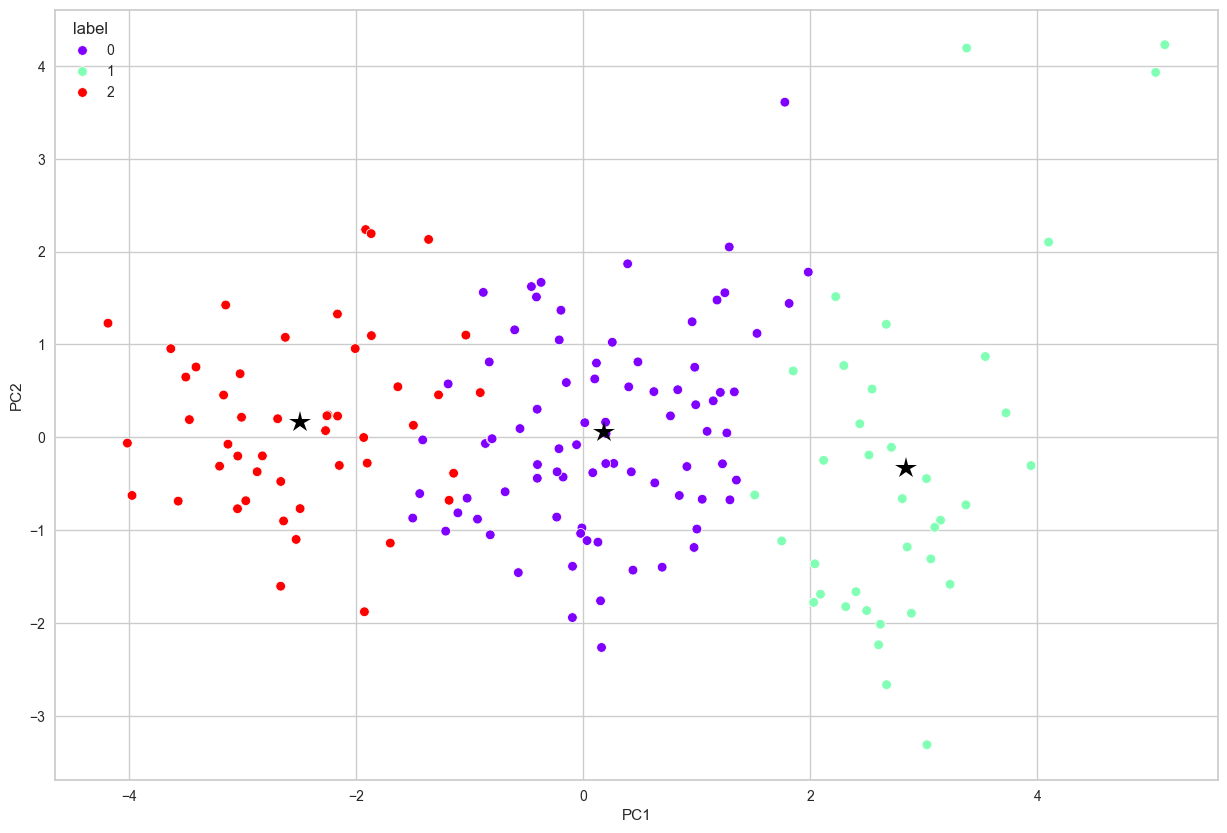

In [39]:
sns.scatterplot(data=final_pca,x="PC1",y="PC2",hue="label",palette="rainbow")
for i in range(3):
    plt.plot(centroids[i][0],centroids[i][1],color="black",marker="*",ms=16)
plt.show()

# Business Interpretation

In [40]:
# lets put labels on the data
df["label"]=pred
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,2
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,0
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,2
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0


In [41]:
df.groupby("label").mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
label,,,,,,,,,
0,21.508537,40.797317,6.231951,48.097561,12281.097561,7.474744,72.875610,2.311707,6291.146341
1,5.237838,53.575000,8.780270,49.129054,42690.878378,2.588432,79.956757,1.755676,36905.405405
2,92.131771,28.546229,6.296458,41.443040,3937.770833,10.438854,59.438542,4.953958,1902.916667


In [42]:
label_map={1:"Developed",0:"Developing",2:"Underdeveloped"}

In [43]:
df["label"]=df["label"].replace(label_map)

In [44]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Underdeveloped
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Developing
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Developing
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,Underdeveloped
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,Developing


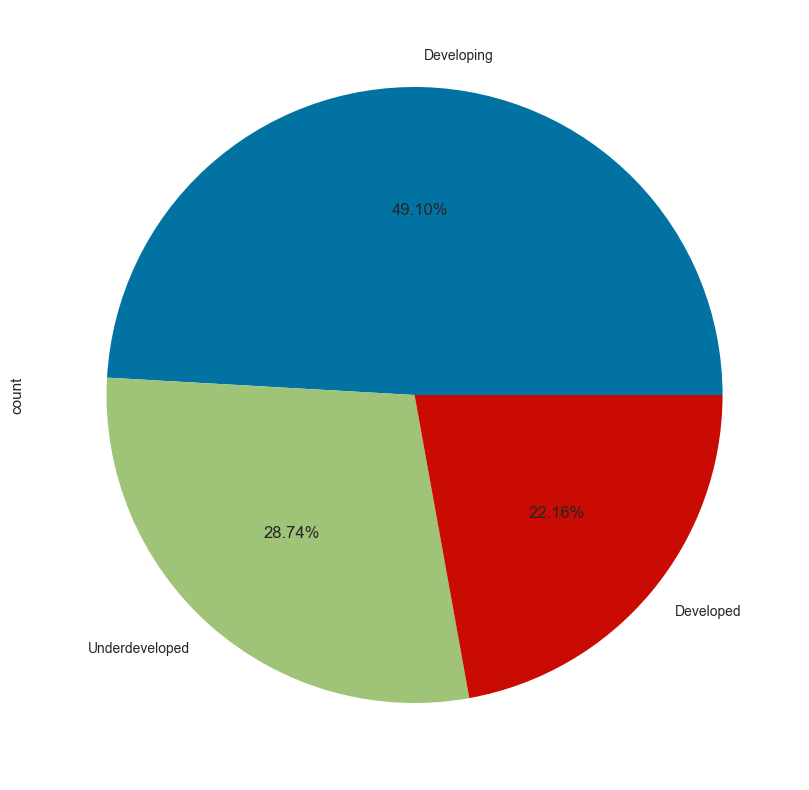

In [45]:
df["label"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.show()

In [46]:
# LEts see the country names that are underdeveloped

need_help=df[df["label"]=="Underdeveloped"].index.to_list()
need_help

['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [47]:
# LEts see the country names that are underdeveloped

no_help=df[df["label"]=="Developed"].index.to_list()
no_help

['Australia',
 'Austria',
 'Bahamas',
 'Bahrain',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [48]:
# LEts see the country names that are underdeveloped

okay_type_help=df[df["label"]=="Developing"].index.to_list()
okay_type_help

['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Nepal',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 'Solomon Islands',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Tajikistan',
 'Thailand',
 'Tonga',
 'Tun

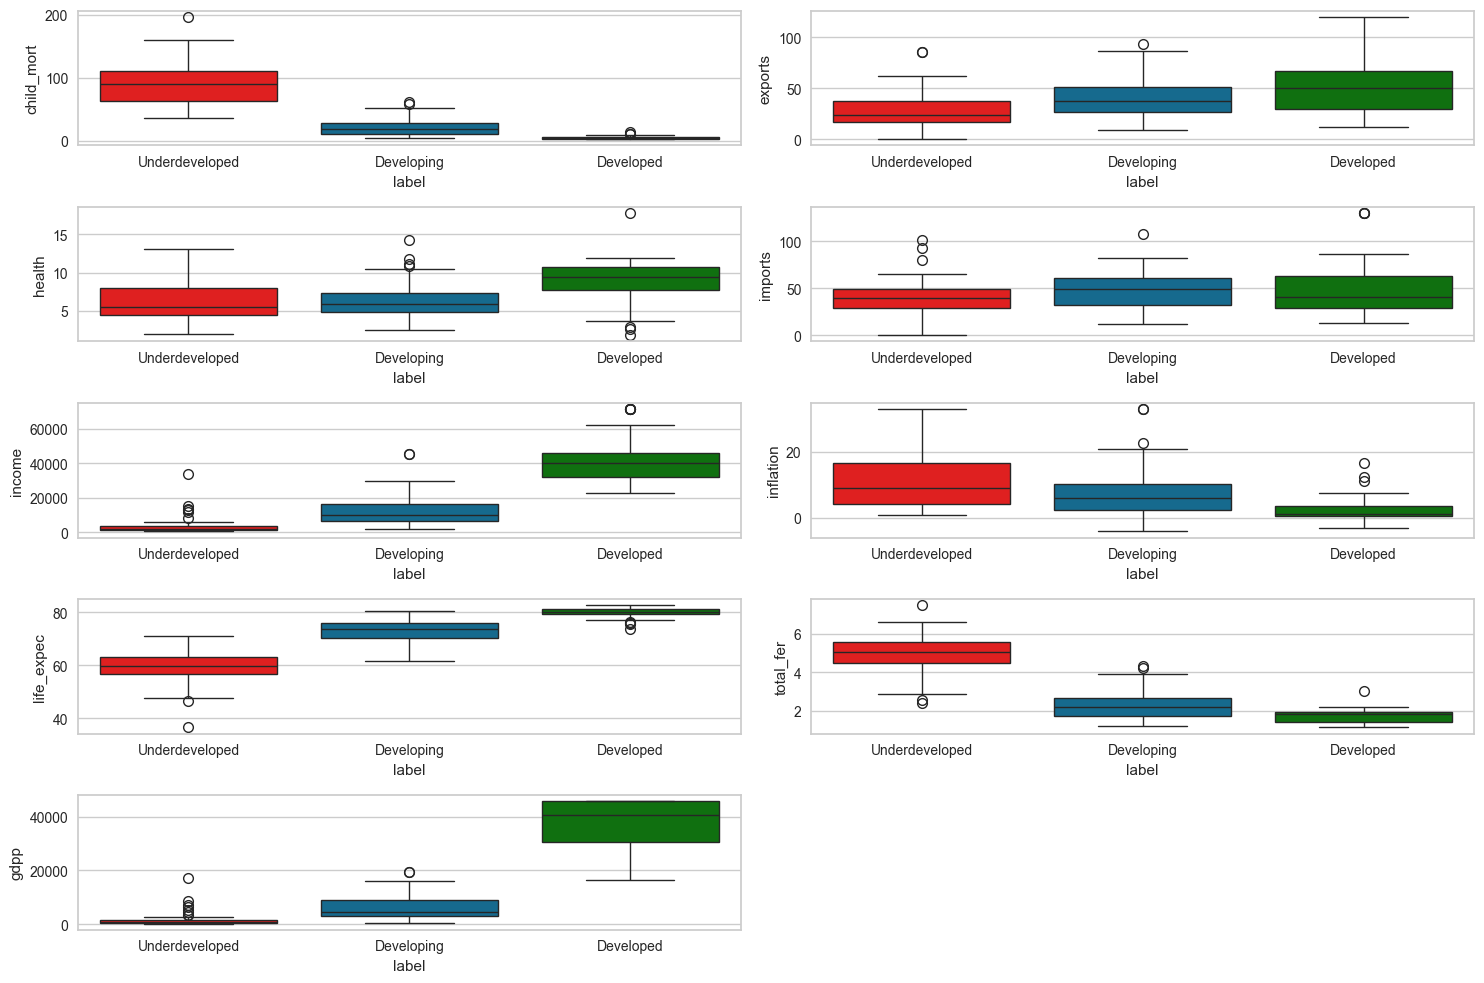

In [49]:
t=1
plt.rcParams["figure.figsize"]=[15,10]
for i in df.select_dtypes(np.number):
    plt.subplot(5,2,t)
    sns.boxplot(data=df,x="label",y=i,palette=["red","b","green"])
    t+=1

plt.tight_layout()
plt.show()

In [52]:
import plotly.express as px

In [51]:
px.choropleth(data_frame=df,locationmode="country names",locations=df.index,color="label",color_discrete_map={"Developed":"green","Developing":"blue","Underdeveloped":"red"})

In [60]:
new_data =  [12 , 11 ,12 , 35 , 12000 , 7.5 , 76 , 2.1 , 7000]
new_data_s = sc.transform([new_data])
new_data_pca = pca1.transform(new_data_s)
kmeans_final.predict(new_data_pca)[0]

np.int32(0)

In [62]:
pwd

'C:\\Users\\Ankit Singh\\Downloads\\WaFJgC'

In [61]:
import joblib

In [63]:
with open('sc.joblib' , 'wb') as file:
    joblib.dump(sc , file)

In [64]:
with open('pca1.joblib' , 'wb') as file:
    joblib.dump(pca1 , file)

In [65]:
with open('final_model.joblib' , 'wb') as file:
    joblib.dump(kmeans_final , file)